# **Style transfer**

Для начала найдем картину Ван Гога — сгодится даже часть Звездной ночи.

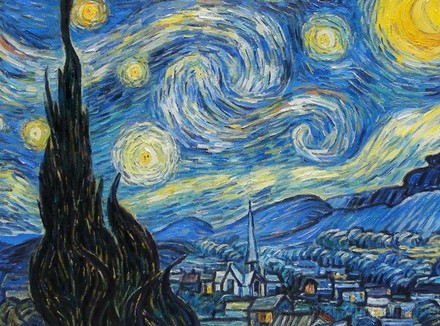

In [1]:
from PIL import Image 
from skimage.io import imread, imsave

image = imread('https://www.hse.ru/data/2017/05/17/1171369516/zvezdnoe_nebo.jpeg')
# Сохранение результата
imsave('starlight_night.jpeg', image)
PIL_image = Image.fromarray(image.astype('uint8'), 'RGB')
PIL_image

## **Train model**

Отправим наше заклинание в коробку и обучим модель. Приятно видеть, что из коробки выпадают логи и держат нас в курсе о процессе обучения.

In [2]:
!python /kaggle/input/neural_style2/pytorch/default/1/neural_style.py train --dataset /kaggle/input/coco-image-caption/train2014 --style-image /kaggle/working/starlight_night.jpeg --save-model-dir /kaggle/working/ --epochs 2 --cuda 1

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|█████████████████████████████████████████| 528M/528M [00:03<00:00, 181MB/s]
Mon Jul 29 17:14:03 2024	Epoch 1:	[2000/82783]	content: 658515.601000	style: 676172.922094	total: 1334688.523094
Mon Jul 29 17:15:35 2024	Epoch 1:	[4000/82783]	content: 600884.168281	style: 421271.911187	total: 1022156.079469
Mon Jul 29 17:17:07 2024	Epoch 1:	[6000/82783]	content: 560668.959250	style: 330725.293057	total: 891394.252307
Mon Jul 29 17:18:39 2024	Epoch 1:	[8000/82783]	content: 530860.383469	style: 283477.145582	total: 814337.529051
Mon Jul 29 17:20:11 2024	Epoch 1:	[10000/82783]	content: 506696.485800	style: 254798.498784	total: 761494.984584
Mon Jul 29 17:21:43 2024	Epoch 1:	[12000/82783]	content: 486988.901729	style: 235027.734253	total: 722016.635982
Mon Jul 29 17:23:15 2024	Epoch 1:	[14000/82783]	content: 471335.516304	style: 220876.227413	total: 692211.743717
Mon

## **Stylize image**

Модель обучена — можно закидывать в нее фотографии.

In [31]:
# url = 'https://ptx.cdntrex.com/contents/videos_screenshots/2424000/2424877/preview.jpg'
# image = imread(url)
# # Сохранение результата
# imsave('inputs/stacy_cruz.jpg', image)
# PIL_image = Image.fromarray(image.astype('uint8'), 'RGB')
# PIL_image

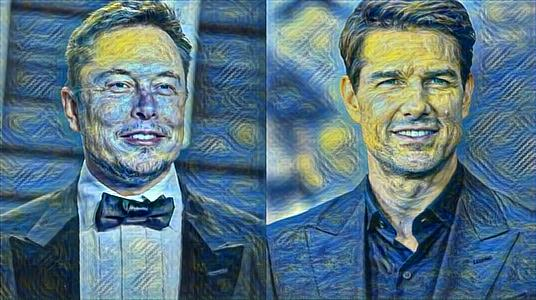

In [9]:
# !python neural_style/neural_style.py eval --content-image inputs/mask_cruise.jpg --model models/van_gogh.model --output-image outputs/mask_cruise_resized.jpg --content-scale 3 --cuda 0

image = imread('outputs/mask_cruise_resized.jpg')
PIL_image = Image.fromarray(image.astype('uint8'), 'RGB')
PIL_image

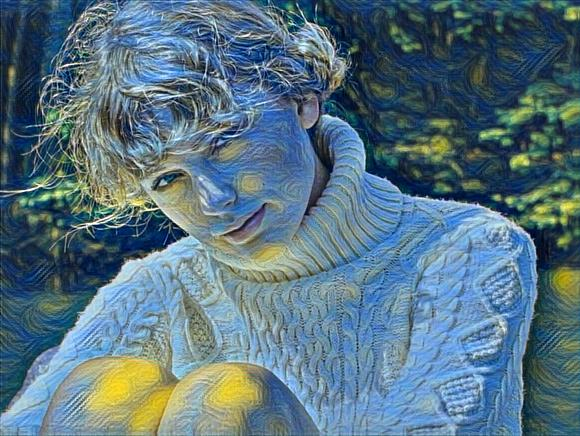

In [12]:
# !python neural_style/neural_style.py eval --content-image inputs/taylor.jpg --model models/van_gogh.model --output-image outputs/taylor_resized.jpg --content-scale 3 --cuda 0

image = imread('outputs/taylor_resized.jpg')
PIL_image = Image.fromarray(image.astype('uint8'), 'RGB')
PIL_image

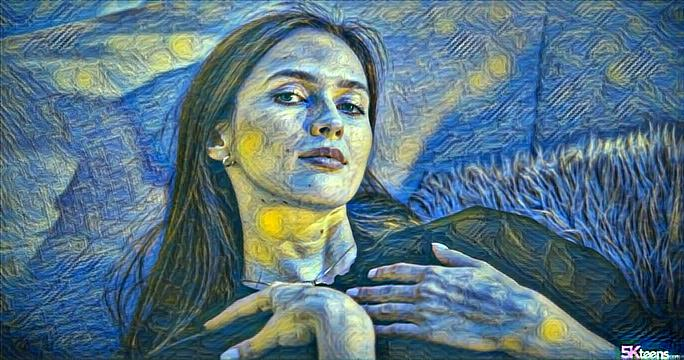

In [5]:
# !python neural_style/neural_style.py eval --content-image inputs/stacy_cruz.jpg --model models/van_gogh.model --output-image outputs/stacy_cruz_resized.jpg --content-scale 3 --cuda 0

image = imread('outputs/stacy_cruz_resized.jpg')
PIL_image = Image.fromarray(image.astype('uint8'), 'RGB')
PIL_image

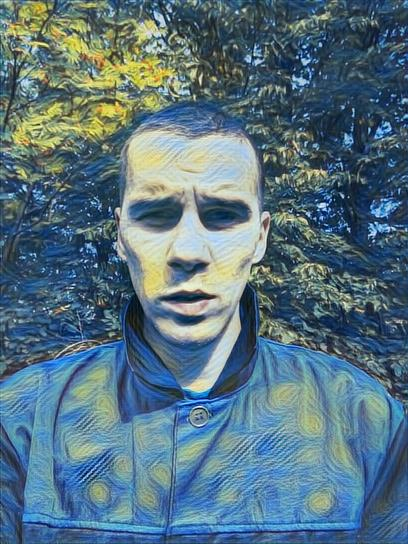

In [13]:
# !python neural_style/neural_style.py eval --content-image inputs/my_photo.jpg --model models/van_gogh.model --output-image outputs/my_photo_resized.jpg --content-scale 6 --cuda 0

image = imread('outputs/my_photo_resized.jpg')
PIL_image = Image.fromarray(image.astype('uint8'), 'RGB')
PIL_image

## **Model converting**

In [44]:
import torch
from neural_style.transformer_net import TransformerNet

model_path = "models/van_gogh.model"
style_transfer_model = TransformerNet() 
style_transfer_model.load_state_dict(torch.load(model_path))

style_transfer_model.eval()

example_input = torch.rand(1, 3, 256, 256)  # Пример входных данных
# Трассировка модели с помощью torch.jit.trace
traced_model = torch.jit.trace(style_transfer_model, example_input)

# Сохранение трассированной модели
traced_model.save("van_gogh_mob_model.pt")